# KNN algorithm Implementation in Python - Exercise

## Overview  
The k-Nearest Neighbors Algorithm is one of the most fundamental and powerful Algorithm to understand, implement and use in classification problems when there is no or little knowledge about the distribution of data.

Testing with different values of k neighbours will be done for comparison purposes.

We have 4th dimensional data and 3 classes.

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import operator
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [31]:
data = sio.loadmat('ex3.data.mat')
X = data['X']
Y = data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(data['X'], data['Y'], test_size=0.5,random_state=0)


In [32]:
class KNN(object):
    def __init__(self, k: int, X_train: np.ndarray, Y_train: np.ndarray) -> None:
        self.k=k
        self.train_data=np.append(X_train,Y_train,axis=1)
        return

    def classify(self, X_test: np.ndarray) -> np.ndarray:
        pred = []
        for i in range(len(X_test)):
            voisins = self.getVoisins(X_test[i])
            pred.append(self.getPredictions(voisins))
        return np.array(pred)
    
    def distance_euclidienne(self,point1, point2, dimension) -> np.ndarray:
        distance = np.array(0.0)
        for i in range(dimension):
            distance += pow(point1[i] - point2[i], 2)
        return math.sqrt(distance)

    def getVoisins(self,point_test):
        distances = []
        voisins = []
        dimension = len(point_test)
        for i in range(len(self.train_data)):
            dist = self.distance_euclidienne(point_test, self.train_data[i], dimension)
            distances.append((self.train_data[i],dist))        
        distances.sort(key=operator.itemgetter(1))
        for i in range(self.k):
            voisins.append(distances[i][0])
        return voisins

    def getPredictions(self,voisins):
        vote_etiquettes = {}
        for i in range(len(voisins)):
            reponse = voisins[i][-1]
            if reponse in vote_etiquettes:
                vote_etiquettes[reponse] += 1
            else:
                vote_etiquettes[reponse] = 1
        prediction = sorted(vote_etiquettes.items(), key=operator.itemgetter(1), reverse=True)
        return prediction[0][0]


<function matplotlib.pyplot.show(close=None, block=None)>

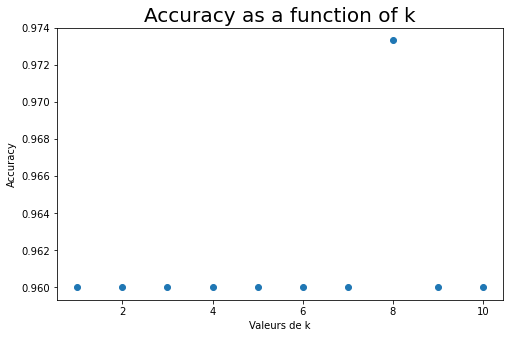

In [33]:
k = np.arange(1,11)
Accuracy1=[]
for i in k:
    model = KNN(i,X_train,Y_train)
    predictions = model.classify(X_test)
    acc=accuracy_score(Y_test,predictions)
    Accuracy1.append(acc)

plt.figure(20, figsize=(8, 5))
plt.clf
plt.scatter(k,Accuracy1)
plt.title("Accuracy as a function of k",fontsize=20)
plt.xlabel("Valeurs de k")
plt.ylabel("Accuracy")
plt.show


# Results

From the testing done, 8 neighvours used for the algorithme gives us the best classification accuracy